Import of all liberys

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from IPython.display import Image
from statistics import mean
from IPython.core.display import splitext
import scipy.stats as stats
import ast
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import random
df2 = pd.read_csv('titles.csv')

In [2]:
df2.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
df2.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [31]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

movie_count=0
show_count =0
for item in df2['type']:
    if item == 'SHOW':
        show_count+=1
    if item=='MOVIE':
        movie_count+=1
print(f'show :{show_count}, movie :{movie_count}')

show :2106, movie :3744


Analayz release_year:

In [5]:
release_count= df2.release_year.value_counts()
release_count= pd.DataFrame(release_count)
release_count

,count
release_year,
2019,836
2020,814
2021,787
2018,773
2017,563
...,...
1960,1
1974,1
1959,1


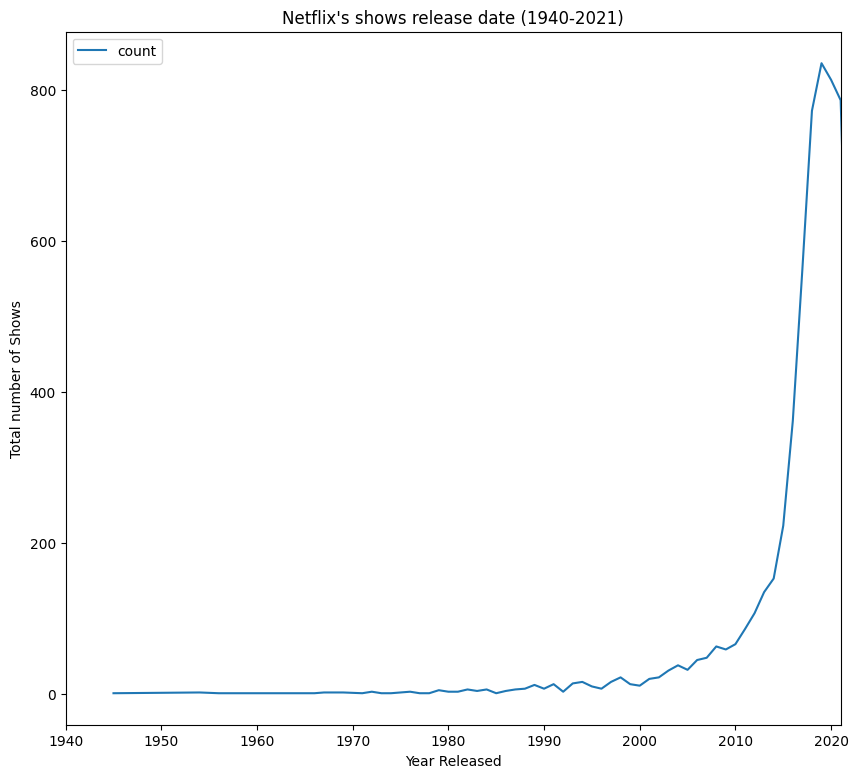

In [6]:
plt.figure(figsize=(10,9))
sns.lineplot(data=release_count)
plt.title("Netflix's shows release date (1940-2021)")
plt.xlim(1940,2021)
plt.xlabel("Year Released")
plt.ylabel("Total number of Shows")
plt.show()


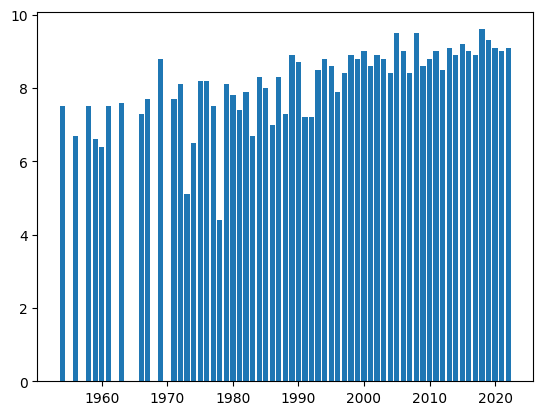

In [7]:
y = df2['imdb_score']
x= df2['release_year']

plt.bar(x,y)
plt.show()

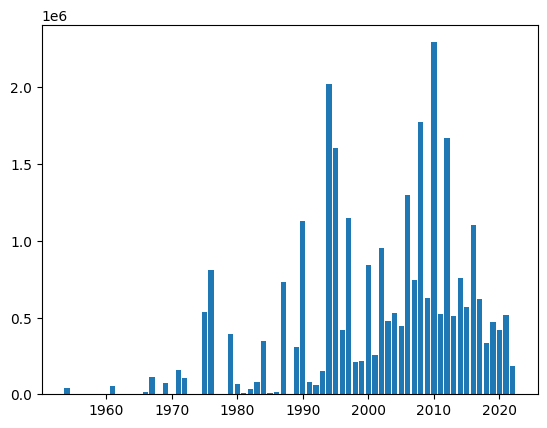

In [8]:
y = df2['imdb_votes']
x= df2['release_year']

plt.bar(x,y)
plt.show()

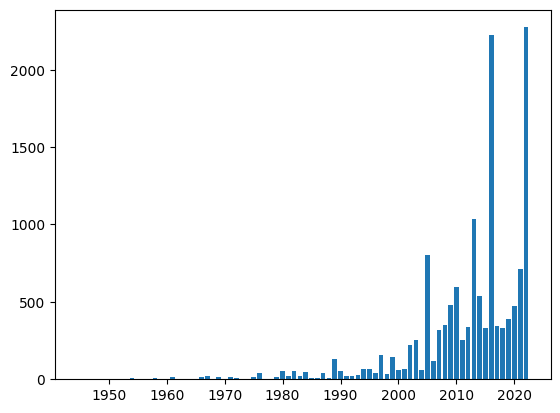

In [14]:
y = df2['tmdb_popularity']
x= df2['release_year']

plt.bar(x,y)
plt.show()

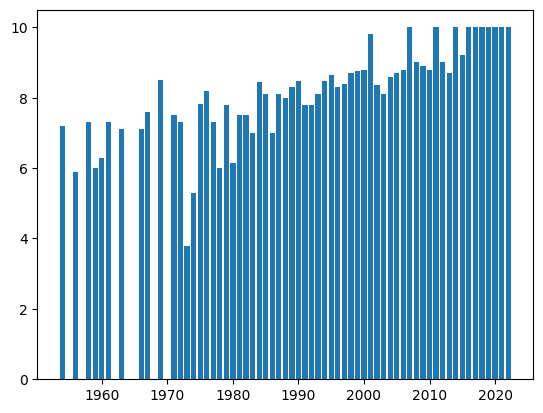

In [15]:
y = df2['tmdb_score']
x= df2['release_year']

plt.bar(x,y)
plt.show()

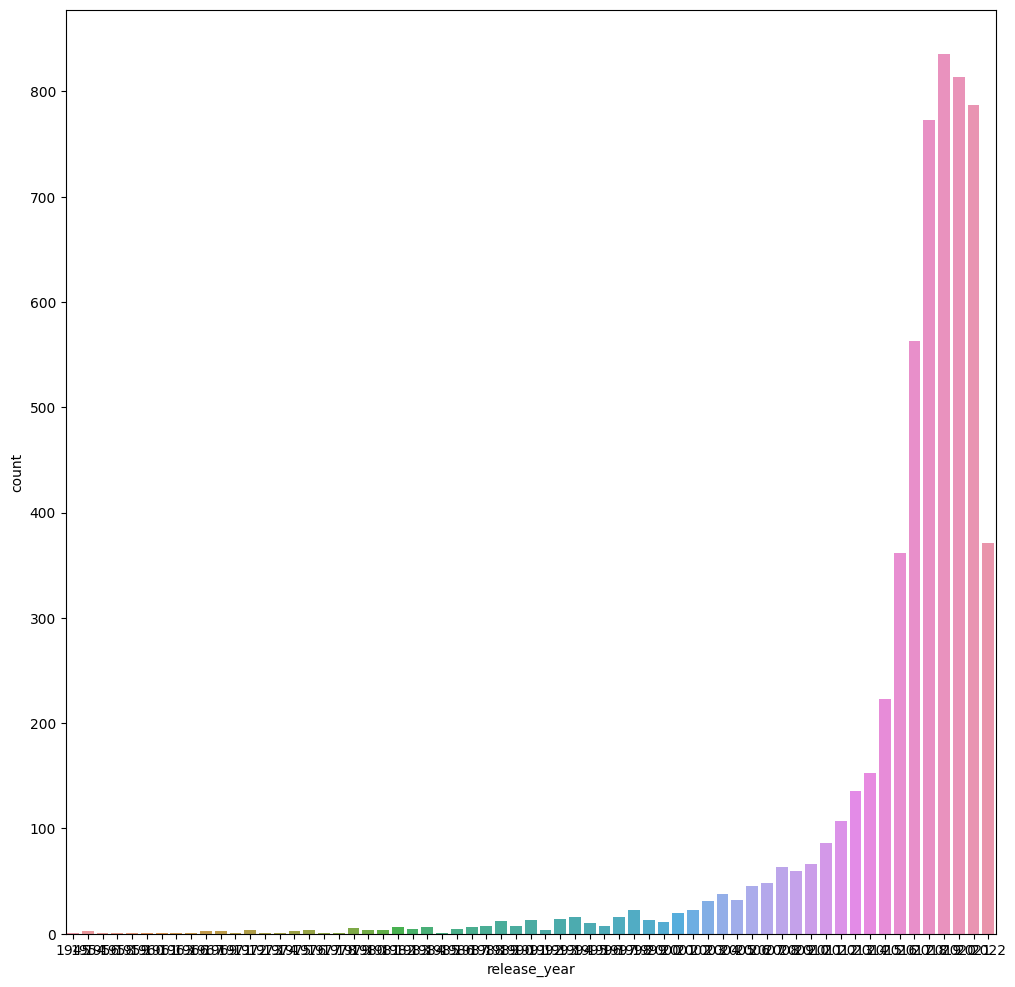

In [9]:
plt.figure(figsize=(12,12))
sns.countplot(x='release_year', data=df2)
plt.show()

counclusion- 
Most of the movies and TV series were released between 2010 and 2020 in our given data, you can see the increase between these years also in the ranking of the sites

Analayz production_countries

<Axes: ylabel='production_countries'>

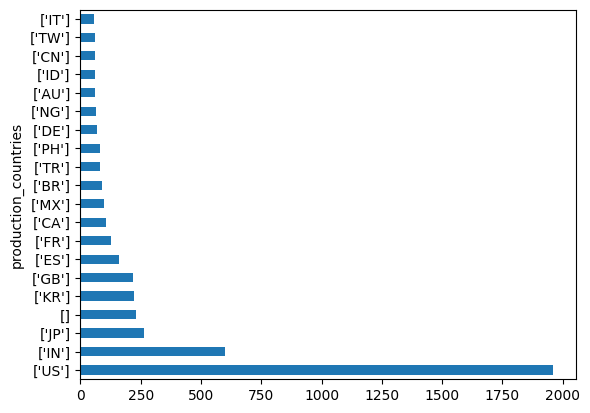

In [20]:
df2["production_countries"].value_counts()[:20].plot(kind='barh')

us india ang japan lead on netflix production countries

Analayz age_certification

<Axes: ylabel='age_certification'>

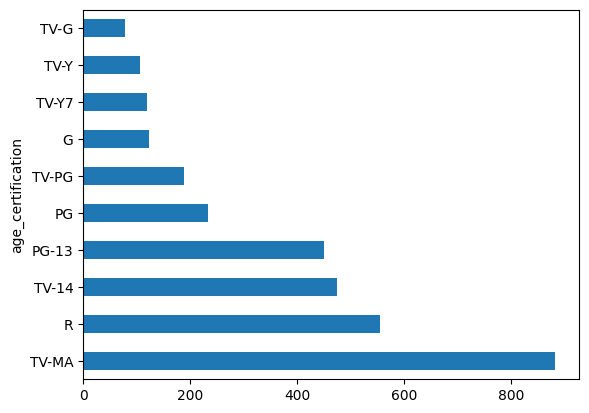

In [22]:
df2["age_certification"].value_counts()[:10].plot(kind='barh')

It can be seen from the viewing classification analysis that the three highest ratings are from ages 14+ and they take a share of 50% of all results.

Analayz genres

<Axes: ylabel='genres'>

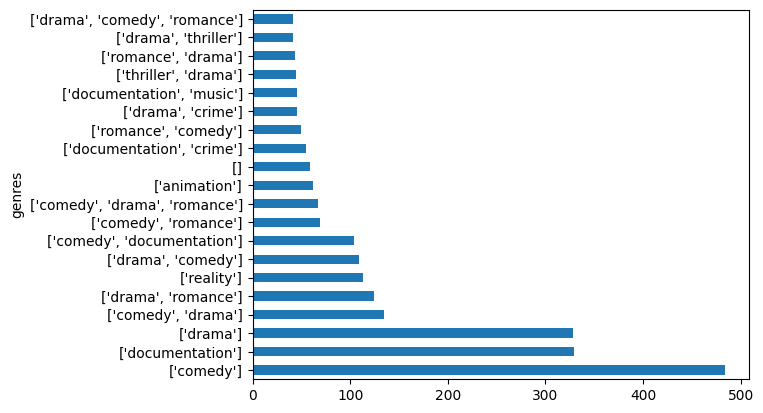

In [24]:
df2["genres"].value_counts()[:20].plot(kind='barh') 

<Figure size 1500x1000 with 0 Axes>

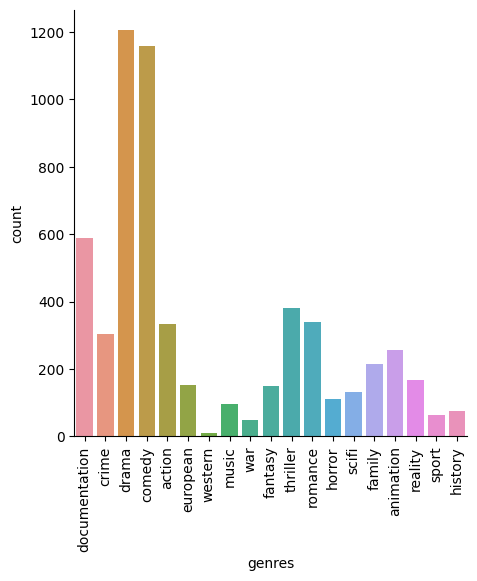

In [32]:
df2["genres"] = df2["genres"].apply(repair_array_bound_categories)
figure_size()
sns.catplot(x='genres', kind="count", data=df2)
plt.xticks(rotation=90)
plt.show()

It can be seen from the genre analysis that comedy and drama are the leading genres found in most combinations

Analayz scores

<Axes: xlabel='imdb_score', ylabel='tmdb_score'>

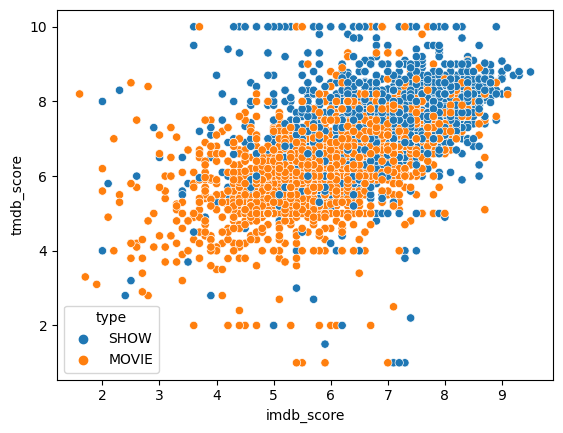

In [10]:
sns.scatterplot(x="imdb_score", y="tmdb_score", hue="type", data=df2)

It is understandable that there are more shows with higher ratings than movies on Netflix

<Axes: xlabel='imdb_score', ylabel='tmdb_popularity'>

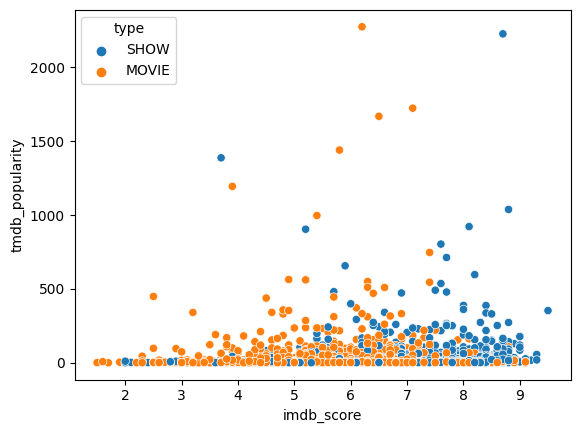

In [11]:
sns.scatterplot(x="imdb_score", y="tmdb_popularity", hue="type", data=df2)

<Axes: xlabel='imdb_votes', ylabel='tmdb_popularity'>

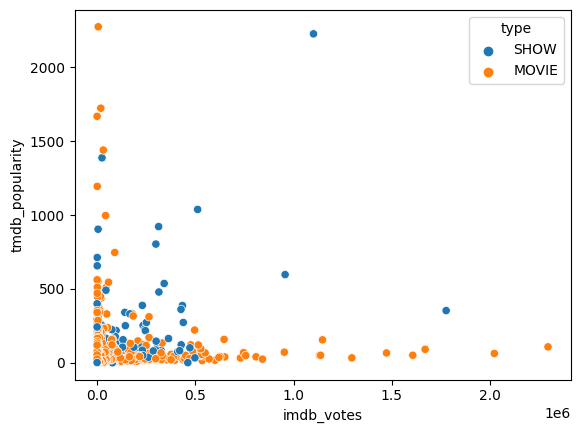

In [12]:
sns.scatterplot(x="imdb_votes", y="tmdb_popularity", hue="type", data=df2)

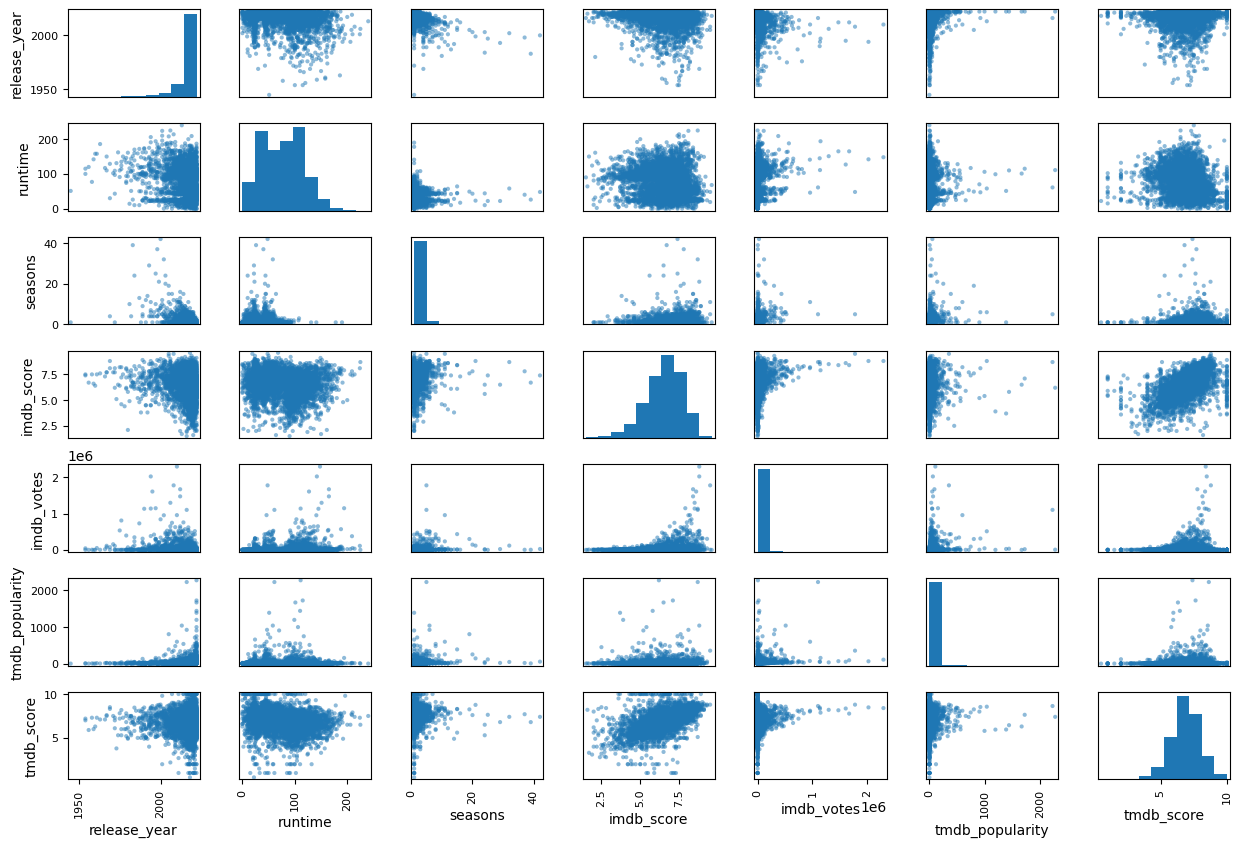

In [17]:
columns = ['release_year', 'runtime', 'seasons',
           'imdb_score', 'imdb_votes', 'tmdb_popularity','tmdb_score']


scatter_matrix = pd.plotting.scatter_matrix(df2[columns], figsize=(15, 10))


for i in range(len(columns)):
    scatter_matrix[i, i].set_xlabel(columns[i])
    scatter_matrix[i, i].set_ylabel(columns[i])


plt.subplots_adjust(wspace=0.3, hspace=0.3)


plt.show()